In [61]:
# import numpy as np
import pandas as pd

import interpreter
import domain
from KMC import KMC2D
import matplotlib.pyplot as plt
import numpy as np


# liste_kT = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00]
# liste_kT = [0.025, 0.10, 0.20, 1.00, 1.40, 2.40]
liste_kT = np.logspace(-1, np.log10(2), num=5)

liste_deltamu = np.linspace(-1, 2.6, 5)

nb_pas_temps = 200
gif = False

nb_iterations=5


In [62]:
moy_gamma_kbt=[]
moy_rugosite_kbt=[]
std_gamma_kbt=[]
std_rugosite_kbt=[]

for dmu in liste_deltamu[2:3]:
    liste_moy_gamma_kbt=[]
    liste_moy_rugosite_kbt=[]
    liste_std_gamma_kbt=[]
    liste_std_rugosite_kbt=[]
    for param_kbT in liste_kT:
        print(param_kbT)
        liste_gamma=[]
        liste_rugosite=[]
        for b in range(nb_iterations):
            print(f"iteration: {b}")
            x = 50
            y = 100
            grid = domain.create_grid(x,y,25)     # [hauteur, largeur]

            grid_f, deltatemps_reel, parametres = KMC2D(grid, param_kbT, dmu, nb_pas_temps,gamma=True, rugosity=True)

            gamma_iteration=parametres[0][-1]
            liste_gamma.append(gamma_iteration)

            rugosite_iteration=parametres[1][-1]
            liste_rugosite.append(rugosite_iteration)

        gamma_moy_param=np.mean(liste_gamma)
        rugosite_moy_param=np.mean(liste_rugosite)

        gamma_std_param=np.std(liste_gamma)
        rugosite_std_param=np.std(liste_rugosite)

        liste_moy_gamma_kbt.append(gamma_moy_param)
        liste_moy_rugosite_kbt.append(rugosite_moy_param)

        liste_std_gamma_kbt.append(gamma_std_param)
        liste_std_rugosite_kbt.append(rugosite_std_param)
    moy_gamma_kbt.append(liste_moy_gamma_kbt)
    moy_rugosite_kbt.append(liste_moy_rugosite_kbt)
    std_gamma_kbt.append(liste_std_gamma_kbt)
    std_rugosite_kbt.append(liste_std_rugosite_kbt)

pd.DataFrame(moy_gamma_kbt).to_csv(f"data/moy_gamma_kbt_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(std_gamma_kbt).to_csv(f"data/std_gamma_kbt_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(moy_rugosite_kbt).to_csv(f"data/moy_rugosite_kbt_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(std_rugosite_kbt).to_csv(f"data/std_rugosite_kbt_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)



0.09999999999999999
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
0.21147425268811282
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
0.4472135954999579
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
0.9457416090031759
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
2.0
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4


In [63]:
gamma_moy_mu = []
rugosite_moy_mu = []
gamma_std_mu = []
rugosite_std_mu = []

for kT in liste_kT[2:3]:
    liste_gamma_moy_mu=[]
    liste_rugosite_moy_mu=[]
    liste_gamma_std_mu=[]
    liste_rugosite_std_mu=[]
    for param_mu in liste_deltamu:
        print(param_mu)
        liste_gamma=[]
        liste_rugosite=[]
        for b in range(nb_iterations):
            x = 50
            y = 100
            grid = domain.create_grid(x,y,25)     # [hauteur, largeur]

            grid_f, deltatemps_reel, parametres = KMC2D(grid, kT, param_mu, nb_pas_temps,gamma=True, rugosity=True)

            gamma_iteration=parametres[0][-1]
            liste_gamma.append(gamma_iteration)

            rugosite_iteration=parametres[1][-1]
            liste_rugosite.append(rugosite_iteration)

        gamma_moy_param=np.mean(liste_gamma)
        rugosite_moy_param=np.mean(liste_rugosite)

        gamma_std_param=np.std(liste_gamma)
        rugosite_std_param=np.std(liste_rugosite)

        liste_gamma_moy_mu.append(gamma_moy_param)
        liste_rugosite_moy_mu.append(rugosite_moy_param)

        liste_gamma_std_mu.append(gamma_std_param)
        liste_rugosite_std_mu.append(rugosite_std_param)
    
    gamma_moy_mu.append(liste_gamma_moy_mu)
    rugosite_moy_mu.append(liste_rugosite_moy_mu)
    gamma_std_mu.append(liste_gamma_std_mu)
    rugosite_std_mu.append(liste_rugosite_std_mu)
pd.DataFrame(moy_gamma_kbt).to_csv(f"data/moy_gamma_mu_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(std_gamma_kbt).to_csv(f"data/std_gamma_mu_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(moy_rugosite_kbt).to_csv(f"data/moy_rugosite_mu_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)
pd.DataFrame(std_rugosite_kbt).to_csv(f"data/std_rugosite_mu_it_{nb_iterations}_{nb_pas_temps}_{x}x{y}.csv", index=False)


-1.0
-0.09999999999999998
0.8
1.7000000000000002
2.6


/tmp/ipykernel_356140/3360309123.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


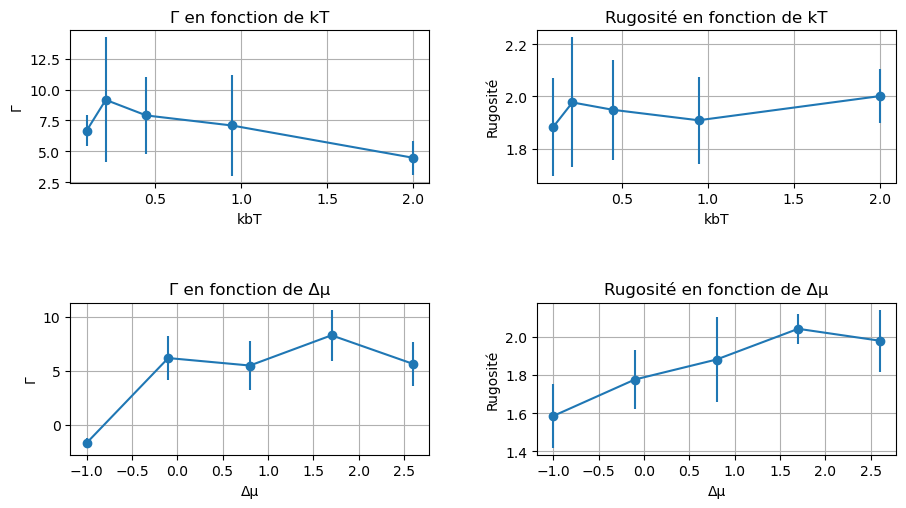

In [67]:
fig,ax=plt.subplots(2,2,figsize=(10,6))
for i in range(len(liste_deltamu[2:3])):
    ax[0][0].errorbar(liste_kT, moy_gamma_kbt[i], std_gamma_kbt[i],fmt='o')
    ax[0][0].plot(liste_kT, moy_gamma_kbt[i],color='#1f77b4')
ax[0][0].grid()
ax[0][0].set_xlabel('kbT')
ax[0][0].set_ylabel('Γ')
ax[0][0].set_title("Γ en fonction de kT")

for i in range(len(liste_deltamu[2:3])):
    ax[0][1].errorbar(liste_kT, moy_rugosite_kbt[i], std_rugosite_kbt[i],fmt='o',label=f"Δμ={liste_deltamu[i]}")
    ax[0][1].plot(liste_kT, moy_rugosite_kbt[i],color='#1f77b4')
ax[0][1].grid()
ax[0][1].set_xlabel('kbT')
ax[0][1].set_ylabel('Rugosité')
ax[0][1].set_title("Rugosité en fonction de kT")

for i in range(len(liste_kT[2:3])):
    ax[1][0].errorbar(liste_deltamu, gamma_moy_mu[i],gamma_std_mu[i],fmt='o')
    ax[1][0].plot(liste_deltamu, gamma_moy_mu[i],color='#1f77b4')
ax[1][0].grid()
ax[1][0].set_xlabel('Δμ')
ax[1][0].set_ylabel('Γ')
ax[1][0].set_title("Γ en fonction de Δμ")

for i in range(len(liste_kT[2:3])):
    ax[1][1].errorbar(liste_deltamu, rugosite_moy_mu[i], rugosite_std_mu[i],fmt='o')
    ax[1][1].plot(liste_deltamu, rugosite_moy_mu[i],color='#1f77b4')
ax[1][1].grid()
ax[1][1].set_xlabel('Δμ')
ax[1][1].set_ylabel('Rugosité')
ax[1][1].set_title("Rugosité en fonction de Δμ")
fig.tight_layout(pad=4.0) 
fig.show()

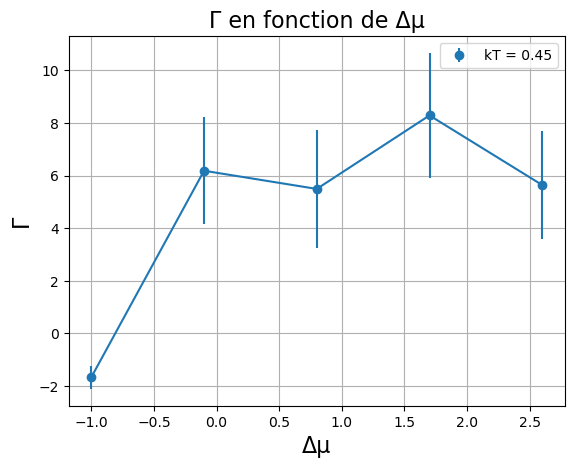

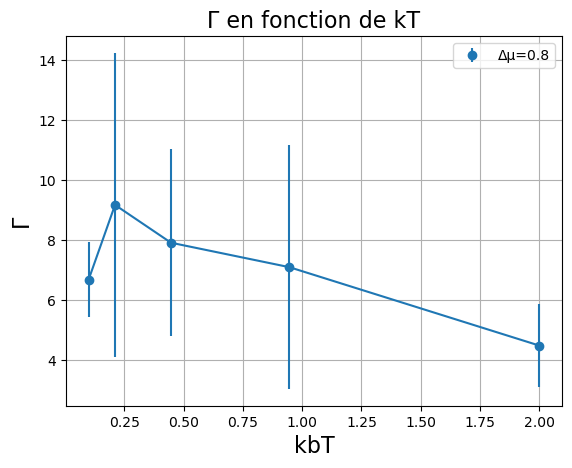

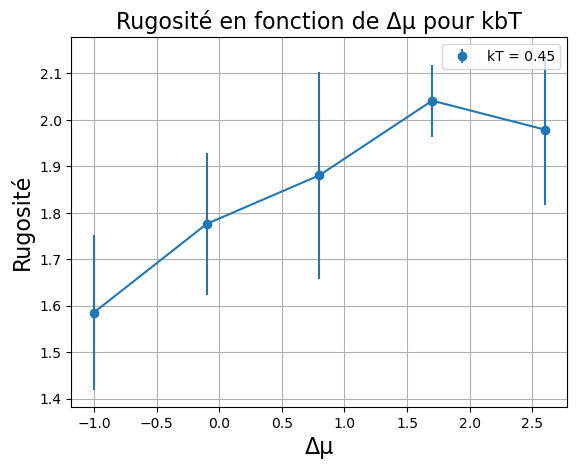

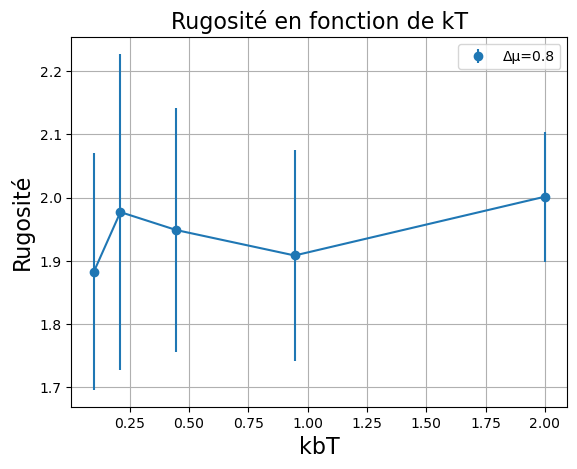

In [65]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.sqrt(x + b)
# popt, pcov = curve_fit(func, liste_kT, moy_gamma_kbt[0], sigma=std_gamma_kbt[0], absolute_sigma=True)


plt.figure()
for index, kT in enumerate(liste_kT[2:3]):
    eb = plt.errorbar(liste_deltamu, gamma_moy_mu[index], yerr=gamma_std_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    color = eb[0].get_color()
    plt.plot(liste_deltamu, gamma_moy_mu[index], color=color)
plt.grid()
plt.xlabel('Δμ',fontsize=16)
plt.ylabel('Γ',fontsize=16)
plt.title("Γ en fonction de Δμ",fontsize=16)
# plt.xlim(-0.7,2.5)
# plt.ylim(-20,15)
plt.legend()
plt.show()

plt.figure()
for i, val in enumerate(liste_deltamu[2:3]):
    eb = plt.errorbar(liste_kT, moy_gamma_kbt[i], std_gamma_kbt[i],fmt='o', label=f"Δμ={round(val,2)}")
    color = eb[0].get_color()
    plt.plot(liste_kT, moy_gamma_kbt[i],color=color)
plt.grid()
plt.xlabel('kbT',fontsize=16)
plt.ylabel('Γ',fontsize=16)
plt.title("Γ en fonction de kT",fontsize=16)
plt.legend()
# plt.xlim(0,1)
# plt.ylim(-40,22)
plt.show()

plt.figure()
for index, kT in enumerate(liste_kT[2:3]):
    eb = plt.errorbar(liste_deltamu, rugosite_moy_mu[index], yerr=rugosite_std_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    color = eb[0].get_color()
    plt.plot(liste_deltamu, rugosite_moy_mu[index], color=color)
plt.grid()
plt.xlabel('Δμ',fontsize=16)
plt.ylabel('Rugosité',fontsize=16)
plt.title("Rugosité en fonction de Δμ pour kbT",fontsize=16)
# plt.xlim(-1.2, 3)
# plt.ylim(-0.1,0.9)
plt.legend()
plt.show()

plt.figure()
for i, val in enumerate(liste_deltamu[2:3]):
    eb = plt.errorbar(liste_kT, moy_rugosite_kbt[i], std_rugosite_kbt[i],fmt='o', label=f"Δμ={round(val,2)}")
    color = eb[0].get_color()
    plt.plot(liste_kT, moy_rugosite_kbt[i], color=color)
plt.grid()
plt.xlabel('kbT',fontsize=16)
plt.ylabel('Rugosité',fontsize=16)
plt.title("Rugosité en fonction de kT",fontsize=16)
plt.legend()
plt.show()



IndexError: list index out of range

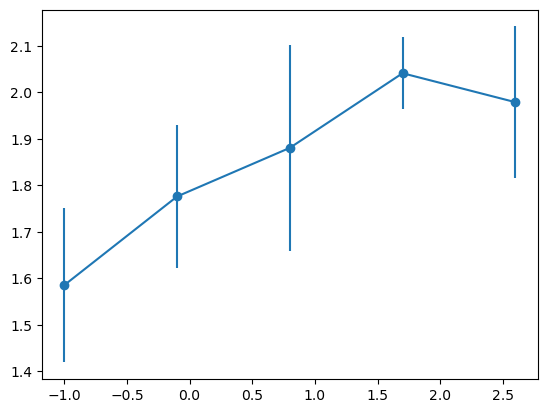

In [66]:
plt.figure()
for index, kT in enumerate(liste_kT):
    plt.errorbar(liste_deltamu, rugosite_moy_mu[index], yerr=rugosite_std_mu[index], fmt='o', label=f'kT = {round(kT,2)}')
    plt.plot(liste_deltamu, rugosite_moy_mu[index], color='#1f77b4')
plt.grid()
plt.xlabel('Δμ')
plt.ylabel('Rugosité')
plt.title("Rugosite en fonction de Δμ")
plt.xlim(-0.6,2.5)
plt.ylim(0.1,1)
plt.legend()
plt.show()
